# Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# Load the dataset (diabetes_scale.txt) in SVMLight format
file_path = "diabetes_scale.txt"  
data, target = load_svmlight_file(file_path)

# Convert the sparse matrix to a dense format
data_dense = data.toarray()

#  inspect the structure of the data
print(f"Shape of the data: {data_dense.shape}")
print(f"First 5 data entries:\n{data_dense[:5]}")
print(f"First 5 target labels:\n{target[:5]}")

# Convert the NumPy array to a pandas DataFrame for better readability
df = pd.DataFrame(data_dense, columns=['Pregnancies', 'Glucose', 'BloodPressure', 
                                       'SkinThickness', 'Insulin', 'BMI', 
                                       'DiabetesPedigreeFunction', 'Age'])
df['Class'] = target  # Add the target labels as a new column

# Visualize a few rows of the DataFrame
print(df.head())


Shape of the data: (768, 8)
First 5 data entries:
[[-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141   -1.         -0.207153
  -0.766866   -0.666667  ]
 [-0.0588235   0.839196    0.0491803  -1.         -1.         -0.305514
  -0.492741   -0.633333  ]
 [-0.882353   -0.105528    0.0819672  -0.535354   -0.777778   -0.162444
  -0.923997   -1.        ]
 [-1.          0.376884   -0.344262   -0.292929   -0.602837    0.28465
   0.887276   -0.6       ]]
First 5 target labels:
[-1.  1. -1.  1. -1.]
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.294118  0.487437       0.180328      -0.292929 -1.000000  0.001490   
1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000 -0.207153   
2    -0.058824  0.839196       0.049180      -1.000000 -1.000000 -0.305514   
3    -0.882353 -0.105528       0.081967      -0.535354 -0.777778 -0.162444   
4    -1.000000  0.

# Visualization

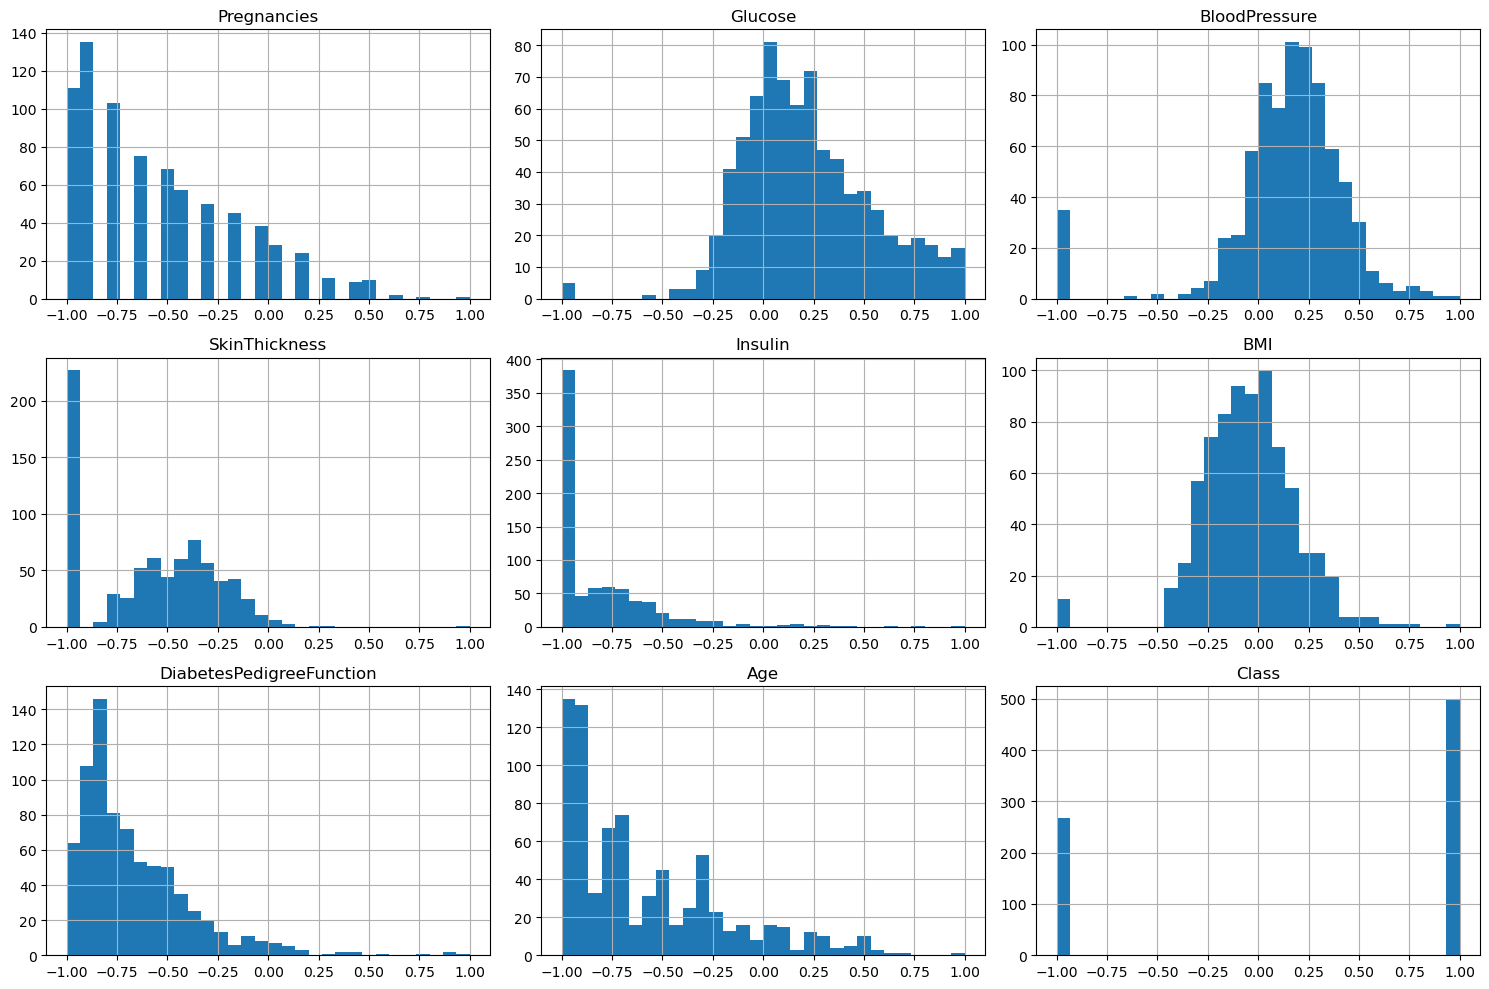

In [2]:
# Visualize the distribution of each feature using histograms
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


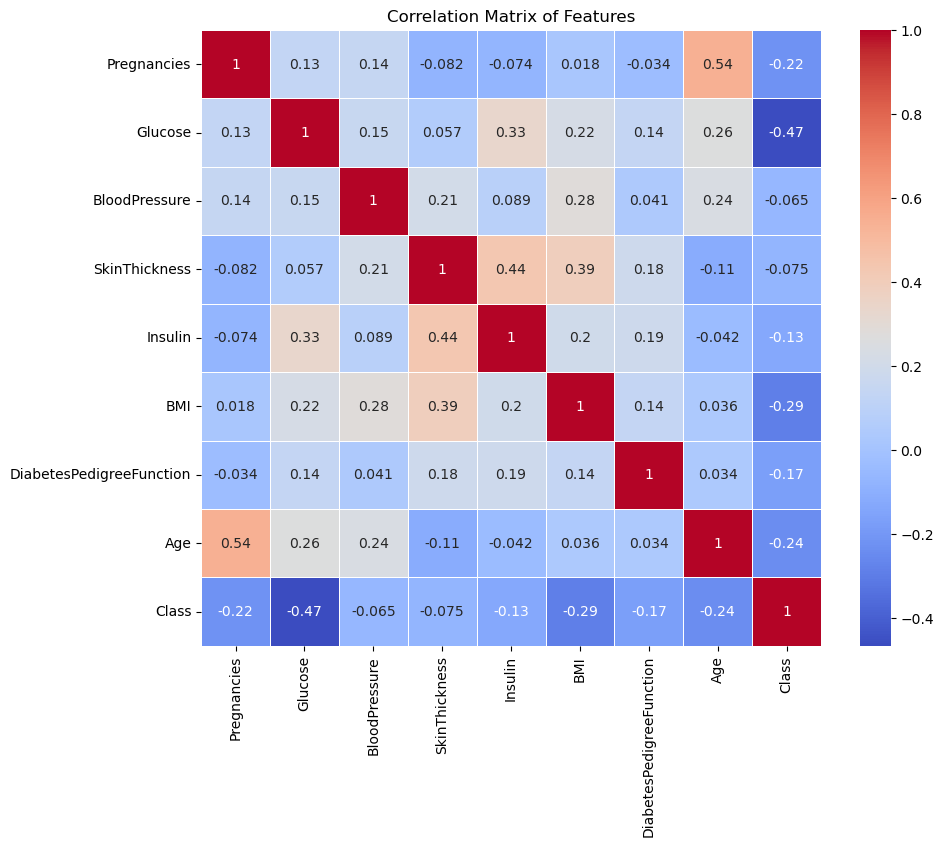

In [3]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


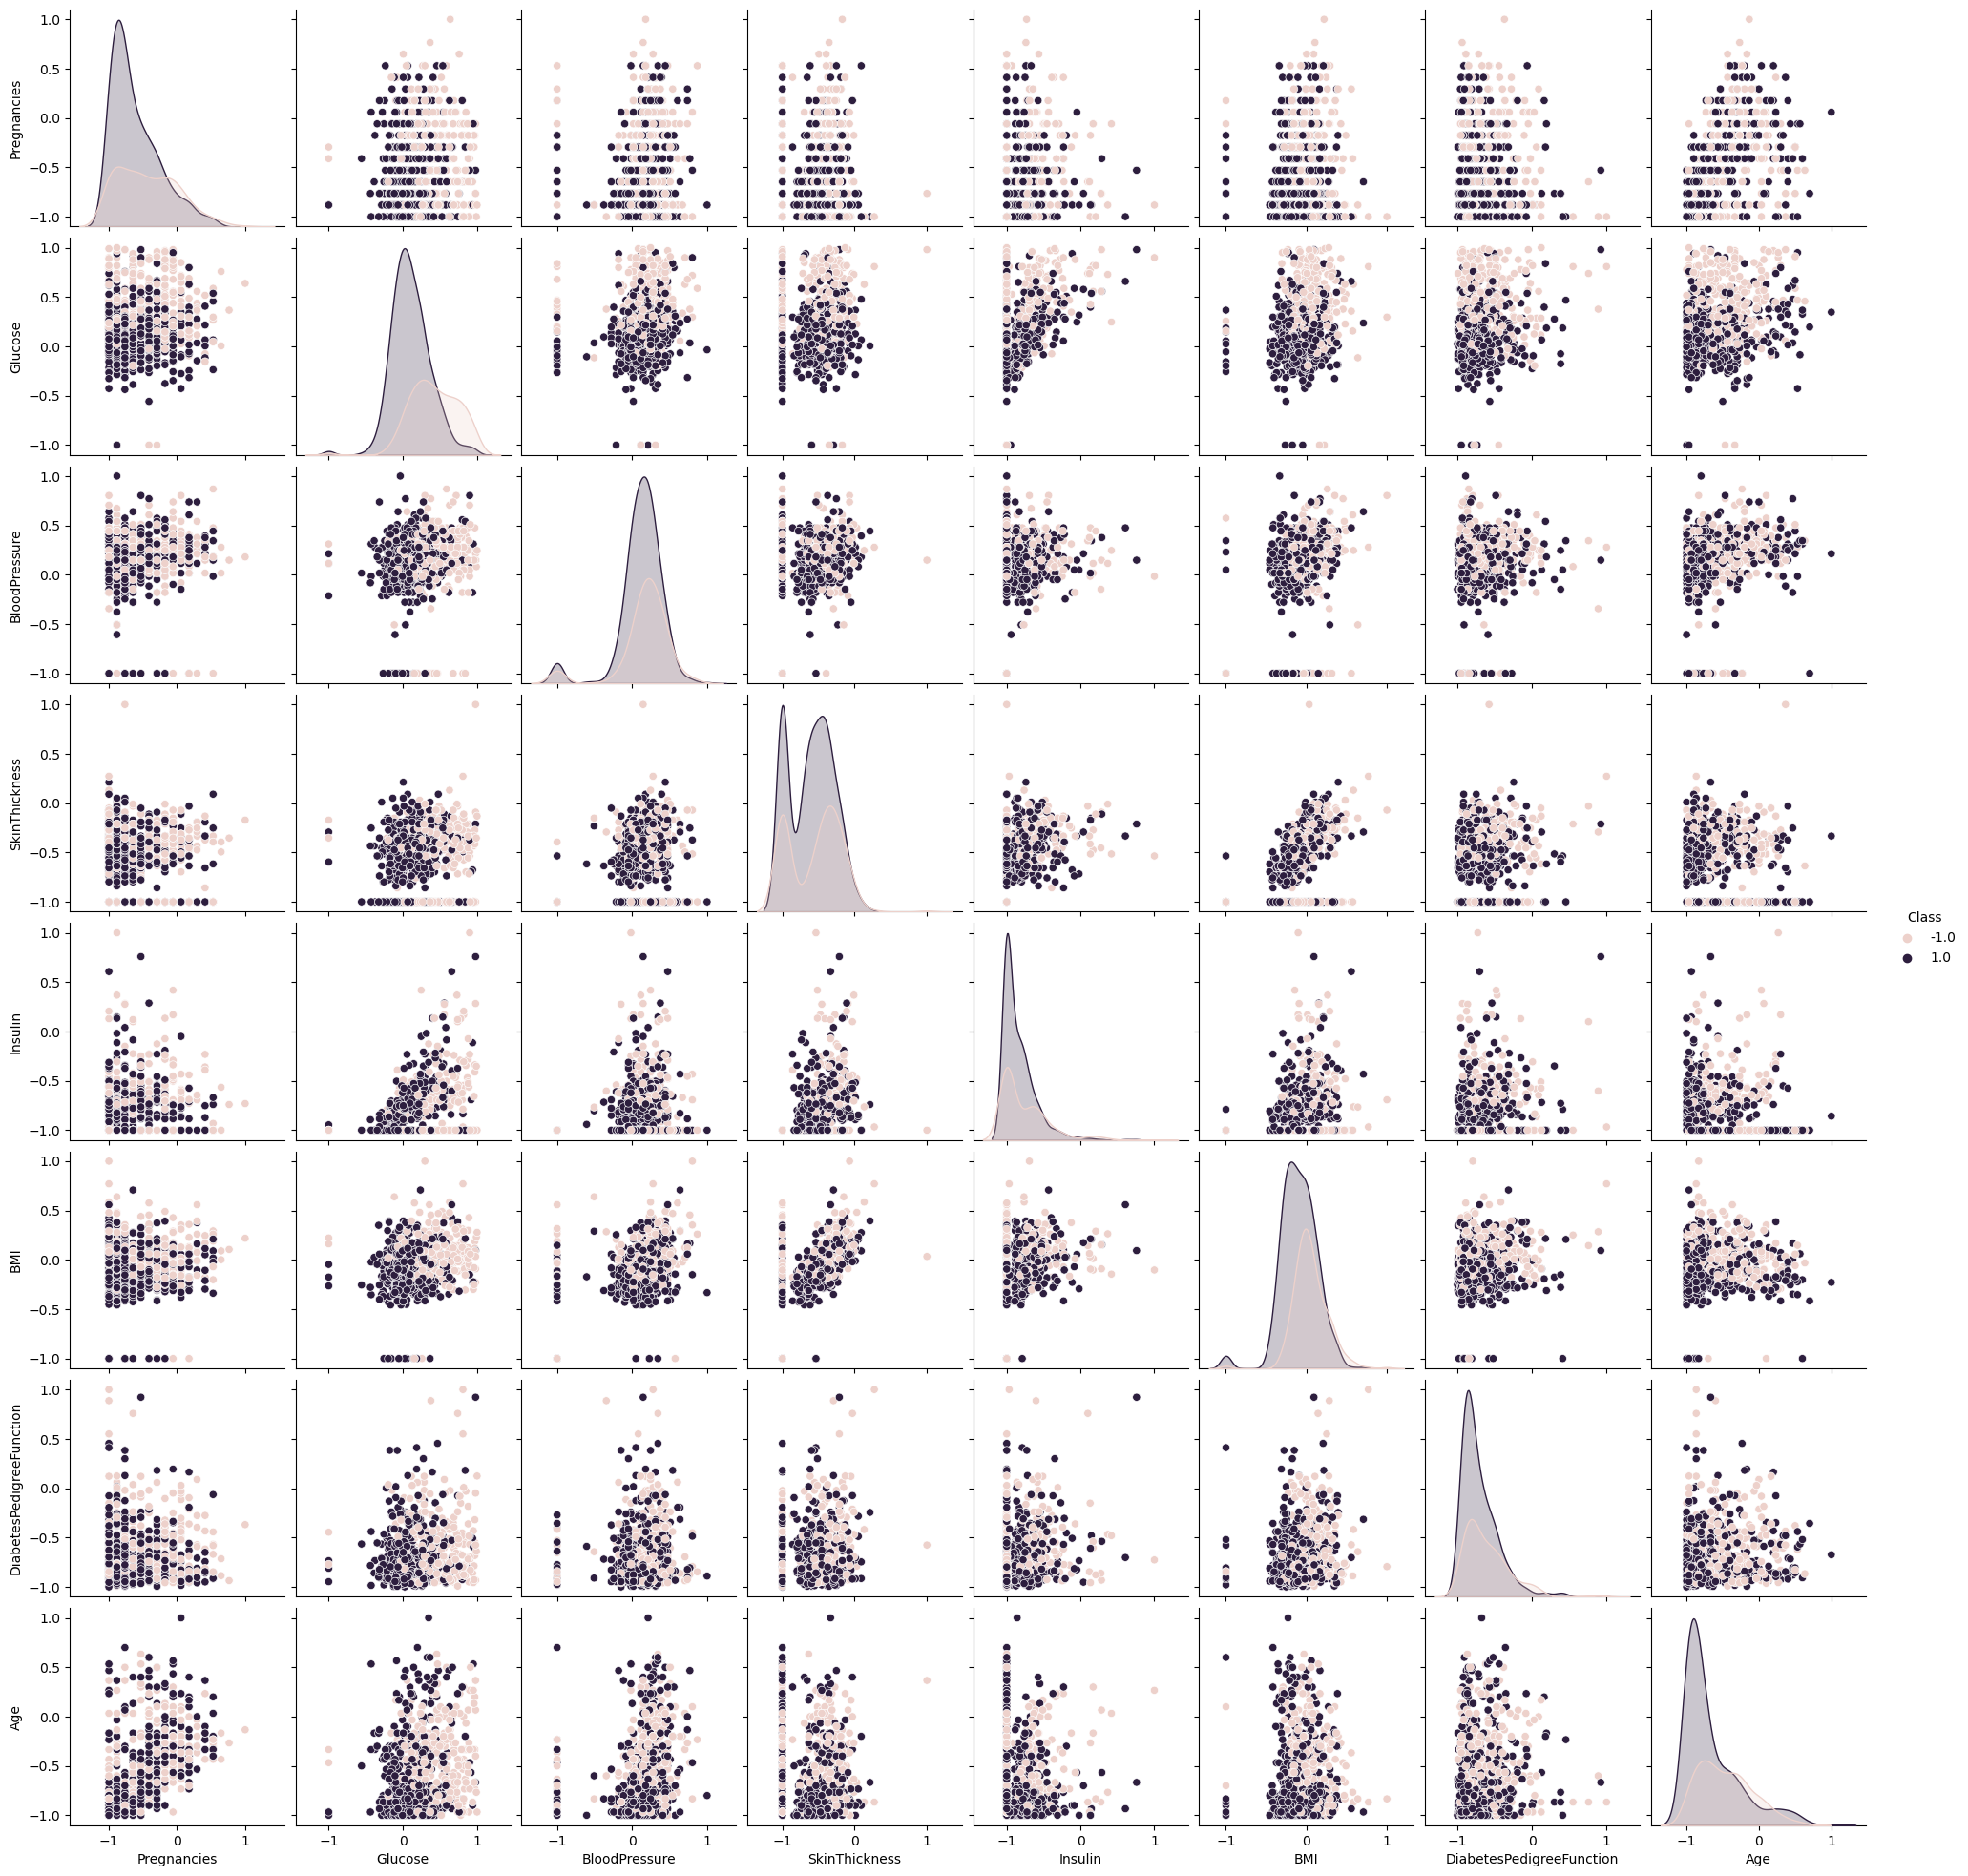

In [4]:

# Visualize relationships between features and the Outcome
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()


# Split Data into Training and Test Sets

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_dense, target, test_size=0.2, random_state=42)

# Verify the split
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (614, 8)
Test data shape: (154, 8)


 ## Base Linear Regression Model 


Confusion Matrix for Linear Regression:
 [[49  6]
 [51 48]]


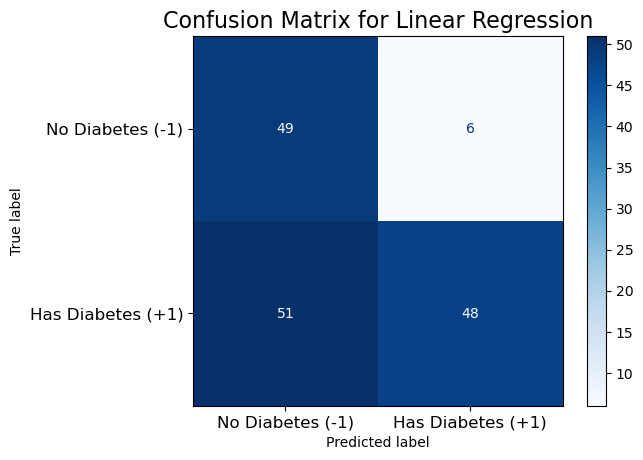

Accuracy for Linear Regression: 62.99%
Recall for Linear Regression: 48.48%

Classification Report for Linear Regression:

                   precision    recall  f1-score   support

 No Diabetes (-1)       0.49      0.89      0.63        55
Has Diabetes (+1)       0.89      0.48      0.63        99

         accuracy                           0.63       154
        macro avg       0.69      0.69      0.63       154
     weighted avg       0.75      0.63      0.63       154



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set 
y_pred_lr = lr_model.predict(X_test)

# Convert predictions to binary classes (1 for positive, 0 for negative)
y_pred_lr_class = [1 if pred >= 0.5 else -1 for pred in y_pred_lr]

# Confusion matrix for Linear Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr_class)
print("\nConfusion Matrix for Linear Regression:\n", conf_matrix_lr)


# Use ConfusionMatrixDisplay for visualization
disp_lr = ConfusionMatrixDisplay(conf_matrix_lr, display_labels=['No Diabetes (-1)', 'Has Diabetes (+1)'])
disp_lr.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix for Linear Regression", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)  # Turn off grid for cleaner look
plt.show()

# Display the confusion matrix
plt.show()

# Accuracy and Recall
accuracy_lr = accuracy_score(y_test, y_pred_lr_class)
recall_lr = recall_score(y_test, y_pred_lr_class, pos_label=1)  # Recall for Has Diabetes (+1)

# Display results
print(f"Accuracy for Linear Regression: {accuracy_lr * 100:.2f}%")
print(f"Recall for Linear Regression: {recall_lr * 100:.2f}%")



# Classification report for Linear Regression
print("\nClassification Report for Linear Regression:\n")
print(classification_report(y_test, y_pred_lr_class, target_names=['No Diabetes (-1)', 'Has Diabetes (+1)']))

# Base Perceptron


Confusion Matrix for Perceptron (from scratch):
 [[46  9]
 [35 64]]


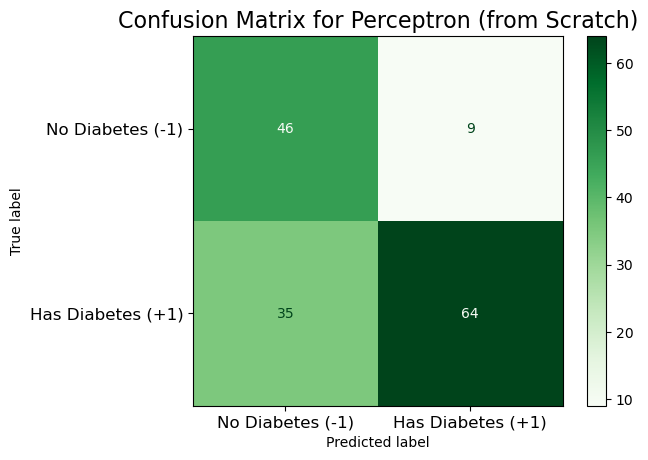

Accuracy for Perceptron (from Scratch): 71.43%
Recall for Perceptron (from Scratch): 64.65%

Classification Report for Perceptron (from scratch):

                   precision    recall  f1-score   support

 No Diabetes (-1)       0.57      0.84      0.68        55
Has Diabetes (+1)       0.88      0.65      0.74        99

         accuracy                           0.71       154
        macro avg       0.72      0.74      0.71       154
     weighted avg       0.77      0.71      0.72       154



In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score

# Perceptron from scratch
class PerceptronScratch:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def get_params(self, deep=True):
        return {'learning_rate': self.learning_rate, 'epochs': self.epochs}

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to -1 and 1
        y_ = np.array([1 if i == 1 else -1 for i in y])

        # Training loop
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)

                # Update weights if there's a misclassification
                if y_pred != y_[idx]:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Instantiate and train the Perceptron
perceptron_scratch = PerceptronScratch(learning_rate=0.01, epochs=100)
perceptron_scratch.fit(X_train, y_train)

# Predict on the test set
y_pred_perc_scratch = perceptron_scratch.predict(X_test)

# Convert -1, 1 predictions to 0, 1 for evaluation
y_pred_perc_scratch = [1 if pred == 1 else -1 for pred in y_pred_perc_scratch]

# Confusion matrix for Perceptron from scratch
conf_matrix_perc_scratch = confusion_matrix(y_test, y_pred_perc_scratch)
print("\nConfusion Matrix for Perceptron (from scratch):\n", conf_matrix_perc_scratch)


# Use ConfusionMatrixDisplay for visualization
disp_perc_scratch = ConfusionMatrixDisplay(conf_matrix_perc_scratch, display_labels=['No Diabetes (-1)', 'Has Diabetes (+1)'])
disp_perc_scratch.plot(cmap='Greens', xticks_rotation='horizontal')
plt.title("Confusion Matrix for Perceptron (from Scratch)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

plt.show()


# Accuracy and Recall for the Base Perceptron
accuracy_perc_scratch = accuracy_score(y_test, y_pred_perc_scratch)
recall_perc_scratch = recall_score(y_test, y_pred_perc_scratch, pos_label=1)  # Recall for Has Diabetes (+1)

# Display results
print(f"Accuracy for Perceptron (from Scratch): {accuracy_perc_scratch * 100:.2f}%")
print(f"Recall for Perceptron (from Scratch): {recall_perc_scratch * 100:.2f}%")


# Classification report for Perceptron (from scratch)
print("\nClassification Report for Perceptron (from scratch):\n")
print(classification_report(y_test, y_pred_perc_scratch, target_names=['No Diabetes (-1)', 'Has Diabetes (+1)']))

# Advanced Perceptron 


Confusion Matrix for High-Level Perceptron:
 [[25 30]
 [ 5 94]]


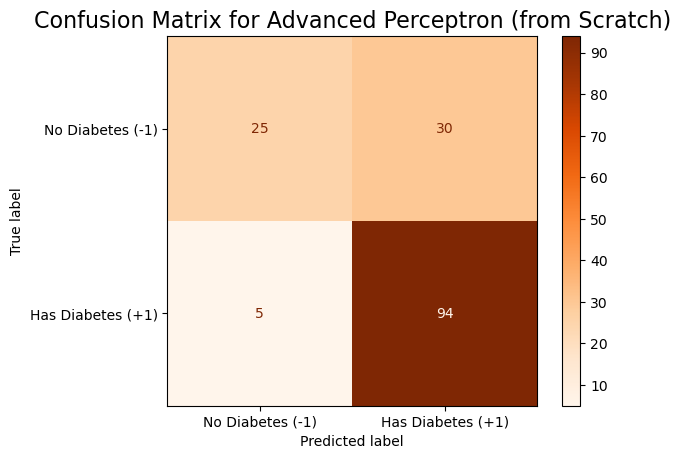

Accuracy for Advanced Perceptron: 77.27%
Recall for Advanced Perceptron: 94.95%

Classification Report for Advanced Perceptron:

                   precision    recall  f1-score   support

 No Diabetes (-1)       0.83      0.45      0.59        55
Has Diabetes (+1)       0.76      0.95      0.84        99

         accuracy                           0.77       154
        macro avg       0.80      0.70      0.72       154
     weighted avg       0.78      0.77      0.75       154



In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Assuming PerceptronScratch is your custom Perceptron class defined earlier
pipeline = Pipeline([
    ('perceptron', PerceptronScratch())  # Use your custom Perceptron class
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'perceptron__epochs': [50, 100, 200, 500],  # Number of epochs for Perceptron
    'perceptron__learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5, 1]  # Learning rates for Perceptron
}

# Perform grid search to find the best parameters

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best perceptron model found by GridSearchCV
best_perceptron = grid_search.best_estimator_

# Predict using the best Perceptron model
y_pred_perc_advanced = best_perceptron.predict(X_test)

# Confusion matrix for advanced Perceptron
conf_matrix_advanced = confusion_matrix(y_test, y_pred_perc_advanced)
print("\nConfusion Matrix for High-Level Perceptron:\n", conf_matrix_advanced)

# Visualize the Confusion Matrix
disp_advanced = ConfusionMatrixDisplay(conf_matrix_advanced, display_labels=['No Diabetes (-1)', 'Has Diabetes (+1)'])
disp_advanced.plot(cmap='Oranges', xticks_rotation='horizontal')
plt.title("Confusion Matrix for Advanced Perceptron (from Scratch)", fontsize=16)
plt.show()

# Accuracy and Recall for Advanced Perceptron
accuracy_advanced = accuracy_score(y_test, y_pred_perc_advanced)
recall_advanced = recall_score(y_test, y_pred_perc_advanced, pos_label=1)

# Display Accuracy and Recall
print(f"Accuracy for Advanced Perceptron: {accuracy_advanced * 100:.2f}%")
print(f"Recall for Advanced Perceptron: {recall_advanced * 100:.2f}%")

# Classification report for Advanced Perceptron
print("\nClassification Report for Advanced Perceptron:\n")
print(classification_report(y_test, y_pred_perc_advanced, target_names=['No Diabetes (-1)', 'Has Diabetes (+1)']))


### Feature importance

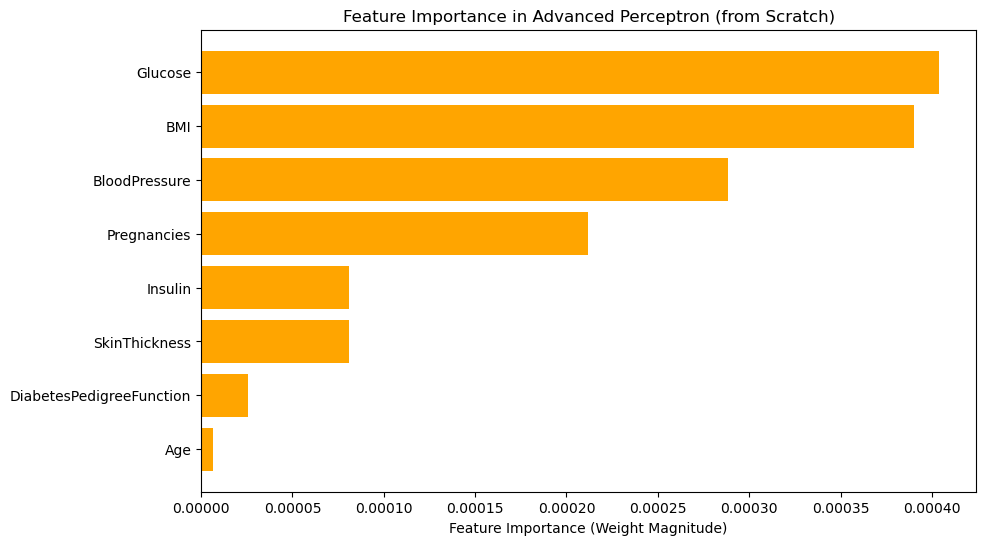

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get the best perceptron model from the pipeline
best_perceptron_model = best_perceptron.named_steps['perceptron']  # Access PerceptronScratch

# Weights from the trained advanced perceptron
feature_importance = np.abs(best_perceptron_model.weights)  # Use absolute value of weights for importance

# Feature names (assuming the same feature names)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Sort the features by importance
indices = np.argsort(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices], align='center', color='orange')
plt.yticks(range(len(indices)), np.array(feature_names)[indices])
plt.xlabel('Feature Importance (Weight Magnitude)')
plt.title('Feature Importance in Advanced Perceptron (from Scratch)')
plt.show()


# MLP classifier

/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
 

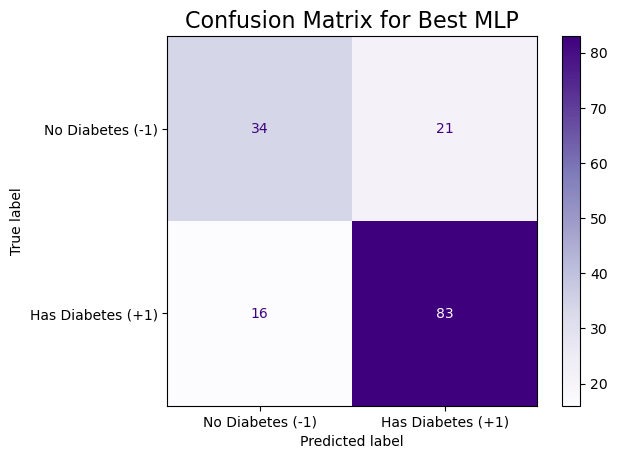

Best MLP Accuracy: 75.97%
Best MLP Recall: 83.84%
Best Parameters from GridSearchCV: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}


/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
 

Cross-validated Recall Scores: [0.87654321 0.9375     0.875      0.8875     0.925     ]
Mean Cross-validated Recall: 90.03%

Classification Report for Best MLP:

                   precision    recall  f1-score   support

 No Diabetes (-1)       0.68      0.62      0.65        55
Has Diabetes (+1)       0.80      0.84      0.82        99

         accuracy                           0.76       154
        macro avg       0.74      0.73      0.73       154
     weighted avg       0.76      0.76      0.76       154



/Users/kurinjiarivazhagan/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:


from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define parameter grid for hyperparameter tuning (no class weights)
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],  # Different architectures
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001],  # Regularization term (L2 penalty)
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

# Initialize MLPClassifier without class weights
mlp = MLPClassifier(max_iter=500, random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best MLP model after tuning
best_mlp = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_mlp = best_mlp.predict(X_test)

# Confusion matrix
conf_matrix_best_mlp = confusion_matrix(y_test, y_pred_best_mlp)
disp_best_mlp = ConfusionMatrixDisplay(conf_matrix_best_mlp, display_labels=['No Diabetes (-1)', 'Has Diabetes (+1)'])
disp_best_mlp.plot(cmap='Purples')
plt.title("Confusion Matrix for Best MLP", fontsize=16)
plt.show()

# Accuracy and recall for the best MLP
accuracy_best_mlp = accuracy_score(y_test, y_pred_best_mlp)
recall_best_mlp = recall_score(y_test, y_pred_best_mlp, pos_label=1)

print(f"Best MLP Accuracy: {accuracy_best_mlp * 100:.2f}%")
print(f"Best MLP Recall: {recall_best_mlp * 100:.2f}%")
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Cross-validation for recall score on the best MLP
cv_scores_recall = cross_val_score(best_mlp, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validated Recall Scores: {cv_scores_recall}")
print(f"Mean Cross-validated Recall: {cv_scores_recall.mean() * 100:.2f}%")

# Classification report
print("\nClassification Report for Best MLP:\n")
print(classification_report(y_test, y_pred_best_mlp, target_names=['No Diabetes (-1)', 'Has Diabetes (+1)']))


## Conclusion:

In medical datasets, especially for predicting diabetes, recall is critical because it ensures that we correctly identify patients who have diabetes (true positives). While a false positive (predicting someone has diabetes when they don’t) can be addressed through further medical testing, a false negative (predicting a patient does not have diabetes when they actually do) can be far more dangerous. It may result in the patient not receiving the necessary treatment or follow-up tests, leading to serious, long-term health consequences. Therefore, I am choosing recall as my primary metric.

### Comparing the recall for all the models:

* Recall for Linear Regression: 48.48%
* Recall for Perceptron (from Scratch): 64.65%
* Recall for Advanced Perceptron: 94.95%
* Best MLP Recall: 83.84%

Based on this comparison, the Advanced Perceptron performed the best, achieving the highest recall of 94.95%, which indicates its superior ability to correctly identify diabetic patients.